In [77]:
from sklearn.datasets import make_classification
import numpy as np
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [78]:
import matplotlib.pyplot as plt

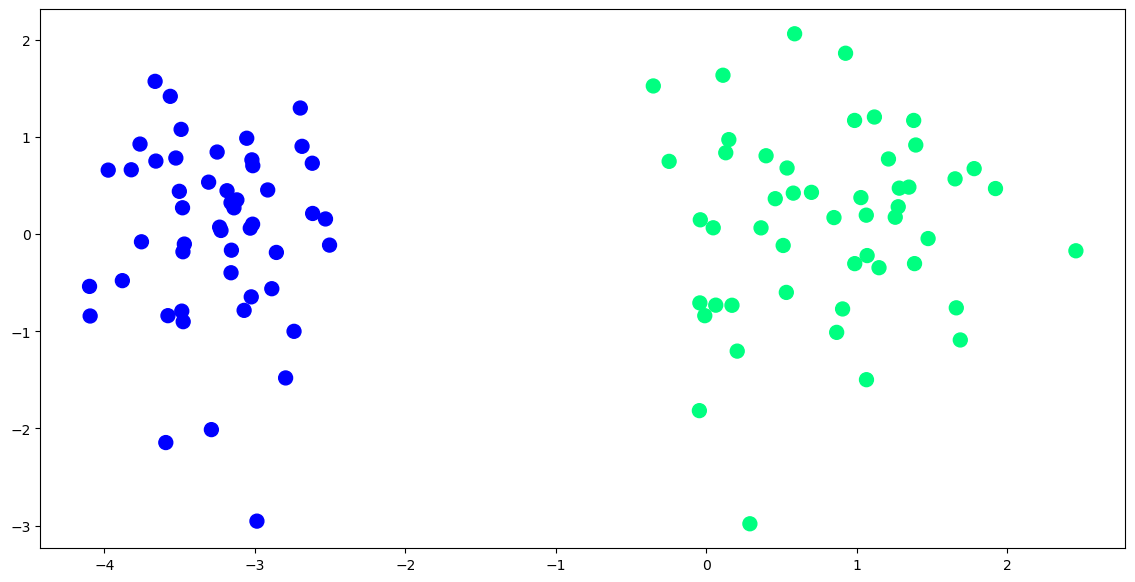

In [79]:
plt.figure(figsize=(14,7))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [80]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty=None,solver='sag')
lr.fit(X,y)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [81]:
print(lr.coef_)
print(lr.intercept_)

[[4.85192585 0.22707258]]
[5.8282486]


In [82]:
m1=-(lr.coef_[0][0] / lr.coef_[0][1])
b1=-(lr.intercept_ / lr.coef_[0][1])

In [83]:
m1,b1

(np.float64(-21.3672909310538), array([-25.6668975]))

In [84]:
x_input=np.linspace(-3,3,100)
y_input=m1 * x_input + b1


In [85]:
def sigmoid(z):
    return 1/ (1+ np.exp(-z))

In [86]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5

    for i in range(5000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights + lr*(np.dot((y-y_hat),X) / X.shape[0])  # w = w + lr * np.dot((y-y_hat),x)/x(rows)
    return weights[0],weights[1:]    


In [87]:
intercept,coef=gd(X,y)

In [88]:
intercept,coef

(np.float64(5.833388649053249), array([4.83926872, 0.21182255]))

In [89]:
m_1=-(coef[0]/coef[1])
b_1=-(intercept/coef[1])

In [90]:
m_1,b_1

(np.float64(-22.84586207917221), np.float64(-27.53903541191917))

In [91]:
x_input_1=np.linspace(-3,3,100)
y_input_1=m_1*x_input_1+b_1

(-3.0, 2.0)

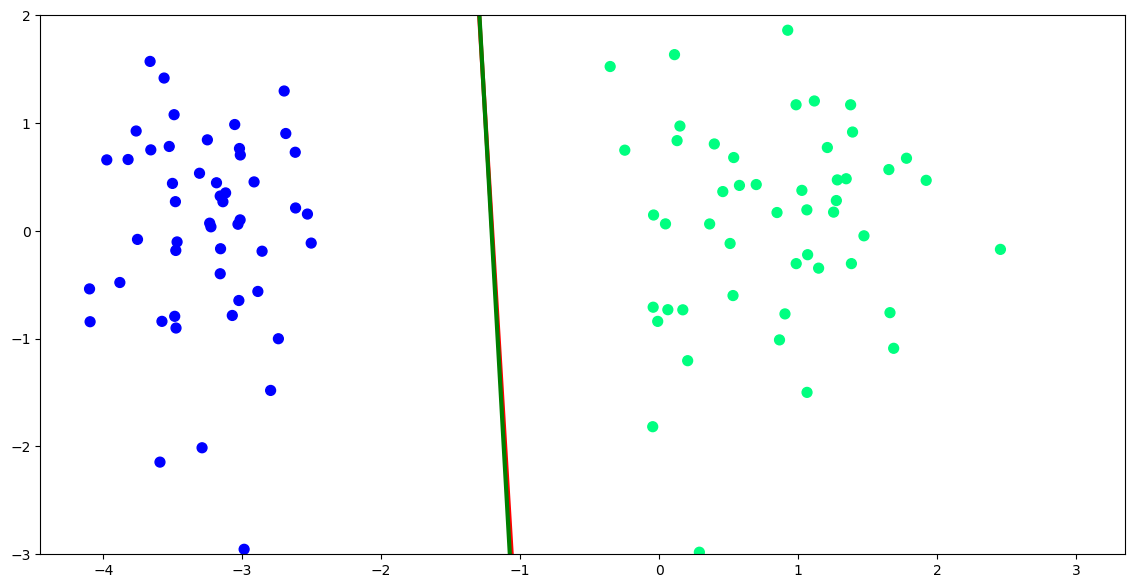

In [94]:
plt.figure(figsize=(14,7))
plt.plot(x_input,y_input,color='r',linewidth=3)
plt.plot(x_input_1,y_input_1,color='g',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)
plt.ylim(-3,2)